In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('scaling_clust_changjun.csv')

sc=StandardScaler()
cc=data[['sum','count']]
cc_scaled=sc.fit_transform(cc)
#cc_scaled=sc.fit_transform(data.drop(['cust'],axis=1))

kmeans=KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(cc_scaled)

cc['cluster']=clusters.labels_

cc.groupby('cluster').count()

<ipython-input-23-d64cda3fa953>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['cluster']=clusters.labels_


,sum,count
cluster,,
0,3942,3942
1,796,796
2,1741,1741
3,866,866


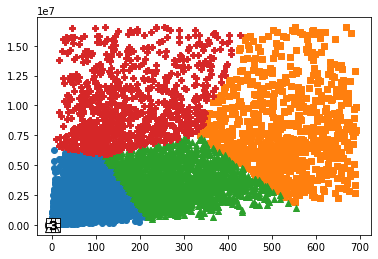

In [24]:
# 2.K-means속성의 cluster_centers_는 개별 클러스터의 중심 위치 좌표를 반환
centers = kmeans.cluster_centers_
unique_labels = np.unique(clusters.labels_)
markers = ['o','s','^','P']
# 3. label별로 루프돌아서 개별 클러스터링의 중심 시각화
for label in unique_labels:
    label_cluster = cc[cc['cluster'] == label]
    # 각 클러스터의 중심 좌표 할당
    center_x_y = centers[label]
    # 각 클러스터 데이터들 시각화
    plt.scatter(x=label_cluster['count'],
               y=label_cluster['sum'],
               marker=markers[label])
    
    # 각 클러스터의 중심 시각화
        # 중심 표현하는 모형 설정
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200,
               color='white', alpha=0.9, edgecolor='k',
               marker=markers[label])
        # 중심 표현하는 글자 설정
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70,
               color='k', edgecolor='k',
               marker='$%d$' % label)# label값에 따라 숫자로 표현한다는 의미
plt.show()

In [25]:
cc.groupby('cluster').mean()

,sum,count
cluster,,
0,1.667398e+06,77.824708
1,7.815826e+06,520.678392
2,3.505198e+06,279.517519
3,9.912214e+06,175.151270


In [26]:
ccc=cc.loc[cc['cluster']==2]
ccc.sort_values(by='sum',ascending='False')
#ccc.sort_values(by='buy_am',ascending='False')

,sum,count,cluster
6497,473440.0,228,2
6064,673500.0,226,2
2058,685030.0,366,2
4785,695630.0,218,2
5250,726723.0,220,2
...,...,...,...
4606,7130686.0,304,2
1144,7185142.0,306,2
2767,7198808.0,306,2
341,7236579.0,299,2
